In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [3]:
train_data = pd.read_csv('/content/Titanic_train.csv')
train_data.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test_data = pd.read_csv('/content/Titanic_test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
train_data.shape,test_data.shape

((891, 12), (418, 11))

In [8]:
train_data.duplicated().sum()

0

In [9]:
test_data.duplicated().sum()

0

In [12]:
train_data['Survived'].value_counts(normalize=True)

,proportion
Survived,
0,0.616162
1,0.383838


<ipython-input-16-fea571524796>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data['Survived'],palette=('#C52219','#23C552'))


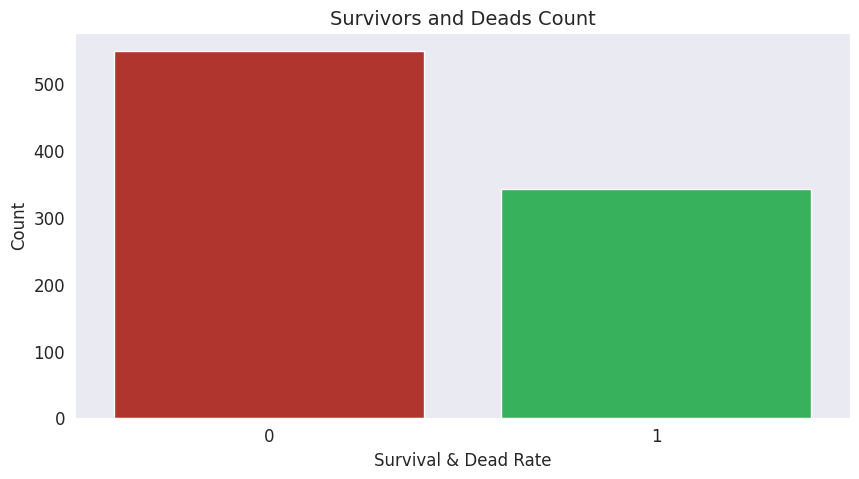

In [16]:
plt.figure(figsize=(10,5))
plt.title('Survivors and Deads Count',fontsize=14)
sns.countplot(x=train_data['Survived'],palette=('#C52219','#23C552'))
plt.xlabel("Survival & Dead Rate",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [17]:
train_data['Sex'].value_counts().to_frame()

,count
Sex,
male,577
female,314


In [18]:
train_data.groupby('Sex').Survived.mean()

,Survived
Sex,
female,0.742038
male,0.188908


<ipython-input-23-9d9634f109e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a=sns.countplot(train_data['Sex'],ax=axarr[0],palette=('#003f7f','#ff007f')).set_title('Passengers count by sex')
<ipython-input-23-9d9634f109e7>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  b=sns.barplot(x='Sex',y='Survived', data=train_data,palette=('#003f7f','#ff007f'),ci=None,ax=axarr[1]).set_ylabel('Survival rate')
<ipython-input-23-9d9634f109e7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b=sns.barplot(x='Sex',y='Survived', data=train_data,palette=('#003f7f','#ff007f'),ci=None,ax=axarr[1]).set_ylabel('Survival rate')


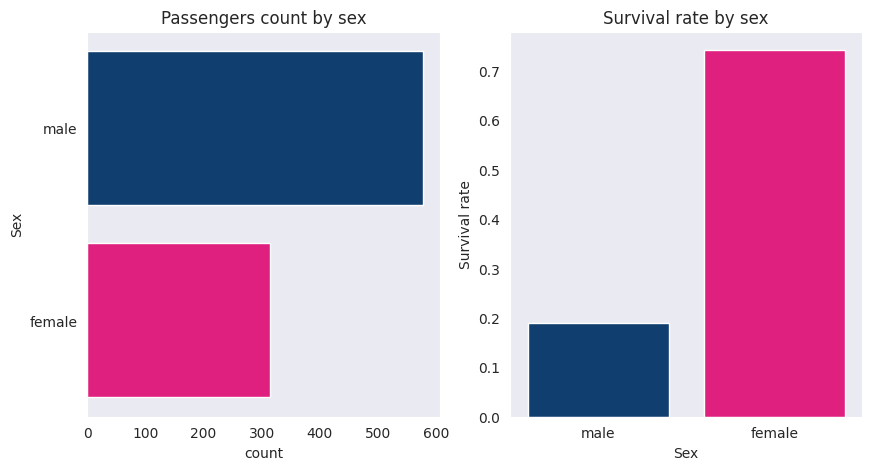

In [23]:
fig,axarr = plt.subplots(1,2,figsize=(10,5))
a=sns.countplot(train_data['Sex'],ax=axarr[0],palette=('#003f7f','#ff007f')).set_title('Passengers count by sex')
axarr[1].set_title('Survival rate by sex')
b=sns.barplot(x='Sex',y='Survived', data=train_data,palette=('#003f7f','#ff007f'),ci=None,ax=axarr[1]).set_ylabel('Survival rate')

In [24]:
train_data['Pclass'].value_counts().to_frame()

,count
Pclass,
3,491
1,216
2,184


In [25]:
train_data.groupby('Pclass').Survived.mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<ipython-input-27-32bbf1ce07d8>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  a=sns.barplot(x='Pclass',y='Survived',data=train_data,palette="Greens",ci=None,ax=axarr[0]).set_ylabel('Survival rate')
<ipython-input-27-32bbf1ce07d8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a=sns.barplot(x='Pclass',y='Survived',data=train_data,palette="Greens",ci=None,ax=axarr[0]).set_ylabel('Survival rate')


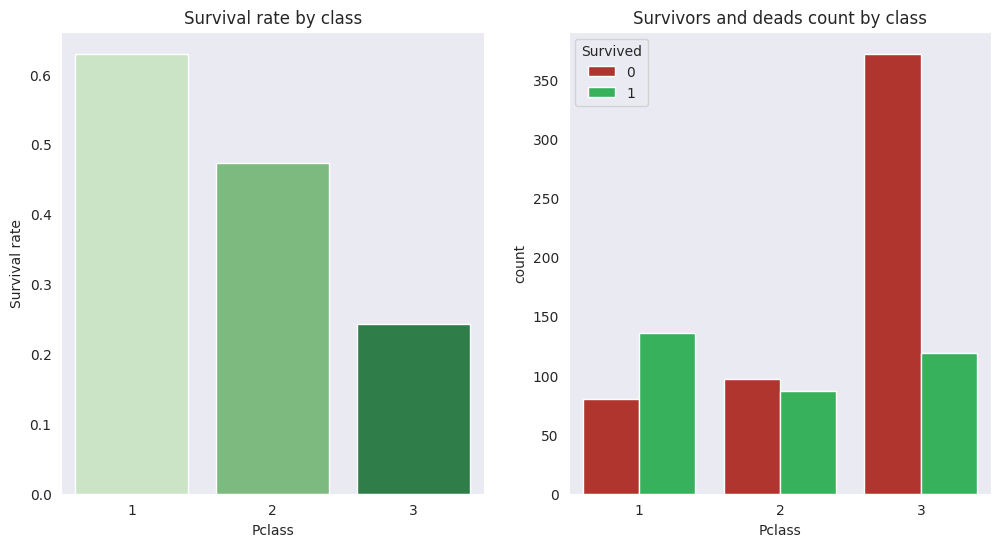

In [27]:
fig,axarr=plt.subplots(1,2,figsize=(12,6))
a=sns.barplot(x='Pclass',y='Survived',data=train_data,palette="Greens",ci=None,ax=axarr[0]).set_ylabel('Survival rate')
axarr[0].set_title('Survival rate by class')
b=sns.countplot(x='Pclass',hue='Survived',data=train_data,palette=('#C52219','#23C552'),ax=axarr[1]).set_title('Survivors and deads count by class')
#

In [28]:
train_data['Embarked'].value_counts().to_frame()

,count
Embarked,
S,644
C,168
Q,77


In [29]:
train_data.groupby('Embarked').Survived.mean().to_frame()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<ipython-input-30-50242e4cce67>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train_data['Embarked'],palette='magma',ax=axarr[0]).set_title('Passengers count by boarding point')


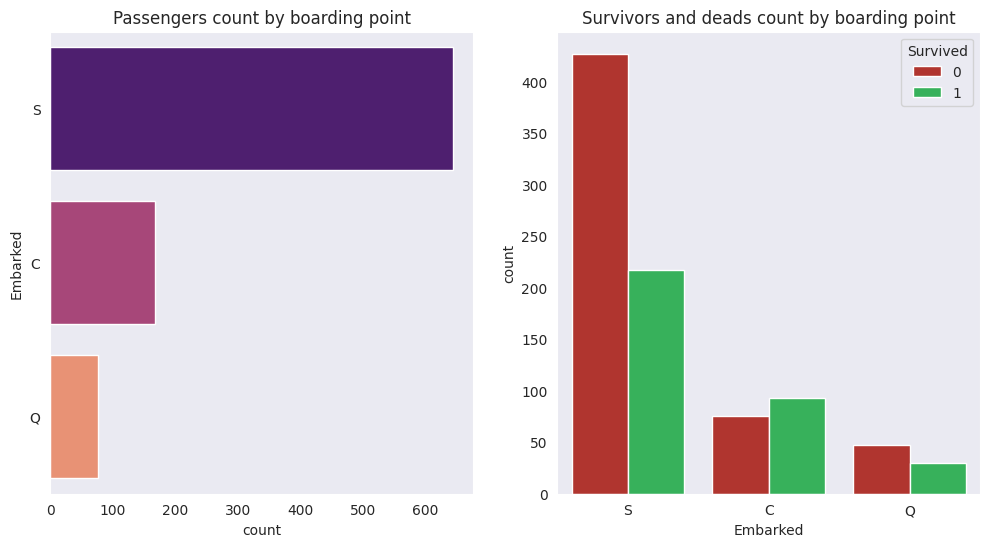

In [30]:
fig,axarr=plt.subplots(1,2,figsize=(12,6))
sns.countplot(train_data['Embarked'],palette='magma',ax=axarr[0]).set_title('Passengers count by boarding point')
p=sns.countplot(x='Embarked', hue='Survived',data=train_data,palette=('#C52219','#23C552'),ax=axarr[1]).set_title('Survivors and deads count by boarding point')

In [31]:
train_data.groupby(['Embarked','Pclass']).Survived.sum().to_frame()

Survived
Embarked Pclass          
C        1             59
         2              9
         3             25
Q        1              1
         2              2
         3             27
S        1             74
         2             76
         3             67

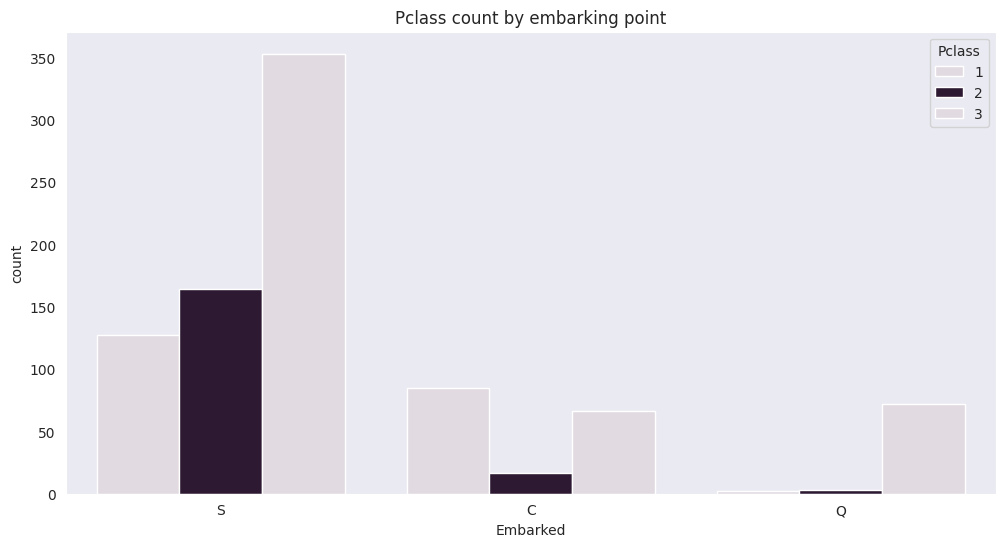

In [32]:
plt.figure(figsize=(12,6))
g=sns.countplot(data=train_data,x='Embarked', hue='Pclass',palette="twilight").set_title('Pclass count by embarking point')

In [39]:
train_data['Title']=train_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
test_data['Title']=test_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())

In [40]:
train_data['Title'].value_counts().to_frame()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Mlle,2
Major,2
Col,2


In [41]:
test_data['Title'].value_counts().to_frame()

,count
Title,
Mr,240
Miss,78
Mrs,72
Master,21
Col,2
Rev,2
Ms,1
Dr,1
Dona,1


In [42]:
train_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
test_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
train_data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
test_data['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

<ipython-input-42-e7f9f5aafc79>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
<ipython-input-42-e7f9f5aafc79>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [43]:
train_data.groupby('Title').Survived.mean()

,Survived
Title,
Dr,0.428571
Master,0.575000
Miss,0.707447
Mr,0.160000
Mrs,0.792000
Rev,0.000000


<ipython-input-44-9b4841f6459b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x='Title', y='Survived', palette="magma", ci=None, data=train_data).set_ylabel('Survival rate')
<ipython-input-44-9b4841f6459b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='Title', y='Survived', palette="magma", ci=None, data=train_data).set_ylabel('Survival rate')


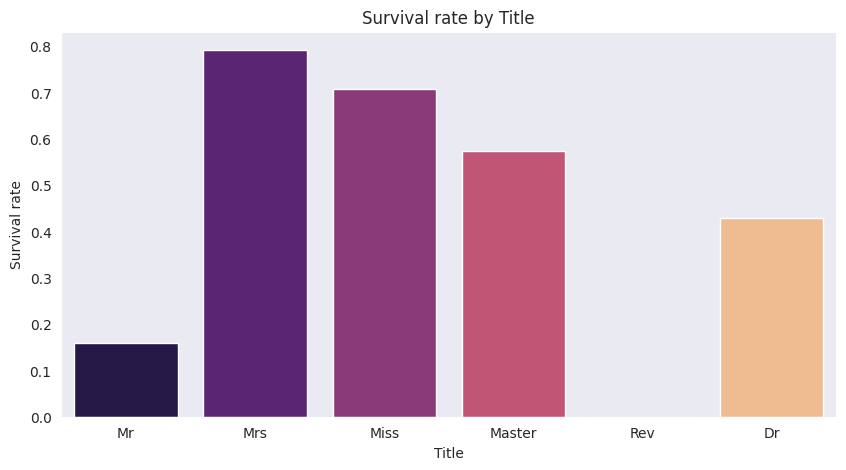

In [44]:
plt.figure(figsize=(10,5))
plt.title('Survival rate by Title')
g = sns.barplot(x='Title', y='Survived', palette="magma", ci=None, data=train_data).set_ylabel('Survival rate')

In [45]:
train_data['Ticket_lett'] = train_data.Ticket.apply(lambda x: x[:2])
test_data['Ticket_lett'] = test_data.Ticket.apply(lambda x: x[:2])

In [46]:
train_data['Ticket_len'] = train_data.Ticket.apply(lambda x: len(x))
test_data['Ticket_len'] = test_data.Ticket.apply(lambda x: len(x))

<ipython-input-47-1d482dd28c03>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(train_data['SibSp'], palette="magma", ax=axarr[0]).set_title('Passengers count by SibSp')
<ipython-input-47-1d482dd28c03>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  b = sns.barplot(x='SibSp', y='Survived', data=train_data, palette="mako", ci=None, ax=axarr[1]).set_ylabel('Survival rate')
<ipython-input-47-1d482dd28c03>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x='SibSp', y='Survived', data=train_data, palette="mako", ci=None, ax=axarr[1]).set_ylabel('Survival rate')


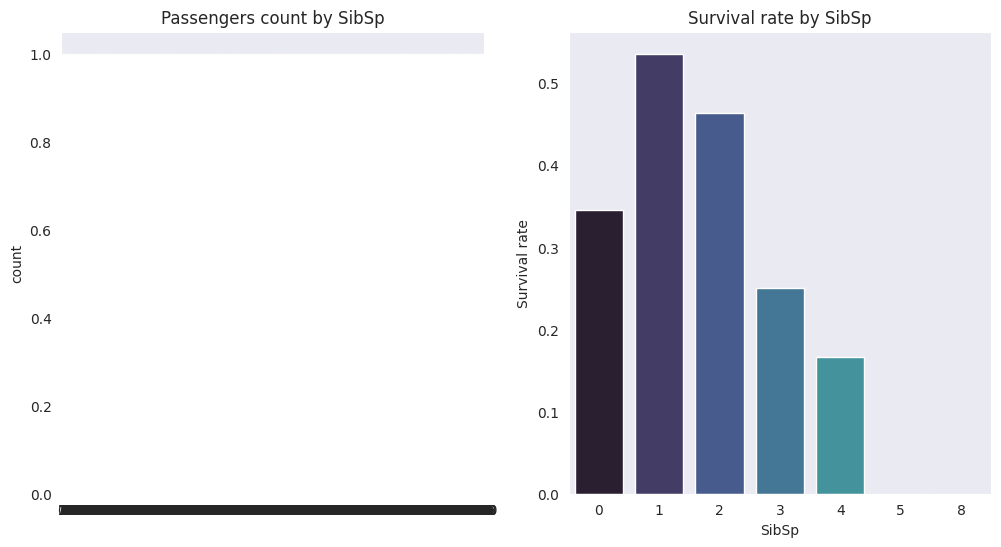

In [47]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(train_data['SibSp'], palette="magma", ax=axarr[0]).set_title('Passengers count by SibSp')
axarr[1].set_title('Survival rate by SibSp')
b = sns.barplot(x='SibSp', y='Survived', data=train_data, palette="mako", ci=None, ax=axarr[1]).set_ylabel('Survival rate')

<Axes: title={'center': 'Survival rate by SibSp'}, xlabel='SibSp', ylabel='count'>

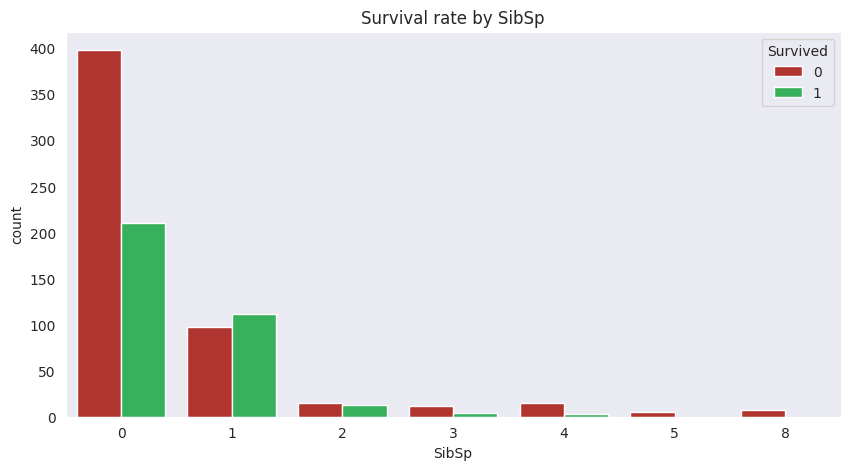

In [48]:
plt.figure(figsize = [10,5])
plt.title('Survival rate by SibSp')
sns.countplot(x='SibSp', hue='Survived', palette=('#C52219', '#23C552'), data=train_data)

<ipython-input-49-1f136b49dae1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(train_data['Parch'], palette="magma", ax=axarr[0]).set_title('Passengers count by Parch')
<ipython-input-49-1f136b49dae1>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  b = sns.barplot(x='Parch', y='Survived', data=train_data, palette="mako", ci=None, ax=axarr[1]).set_ylabel('Survival rate')
<ipython-input-49-1f136b49dae1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x='Parch', y='Survived', data=train_data, palette="mako", ci=None, ax=axarr[1]).set_ylabel('Survival rate')


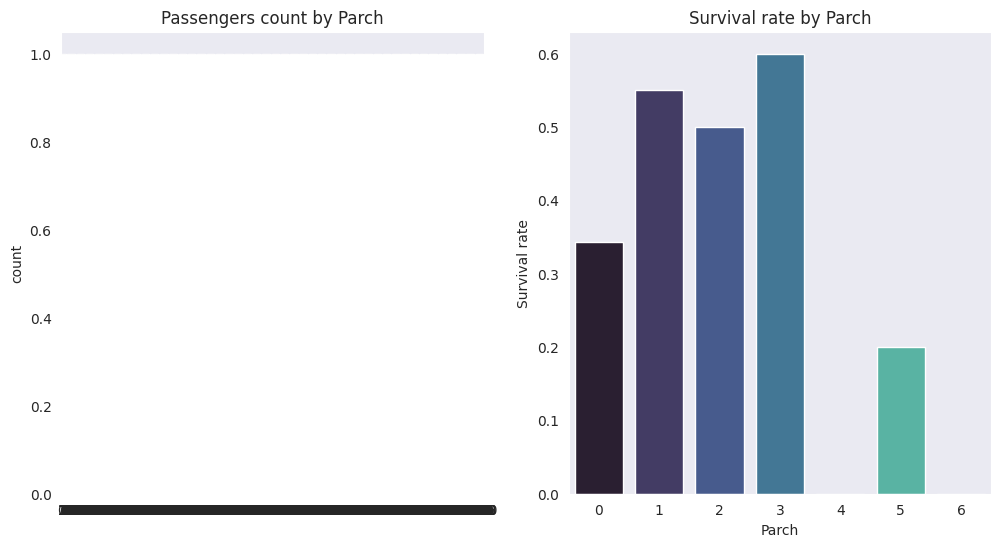

In [49]:
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(train_data['Parch'], palette="magma", ax=axarr[0]).set_title('Passengers count by Parch')
axarr[1].set_title('Survival rate by Parch')
b = sns.barplot(x='Parch', y='Survived', data=train_data, palette="mako", ci=None, ax=axarr[1]).set_ylabel('Survival rate')

<Axes: title={'center': 'Survival rate by Parch'}, xlabel='Parch', ylabel='count'>

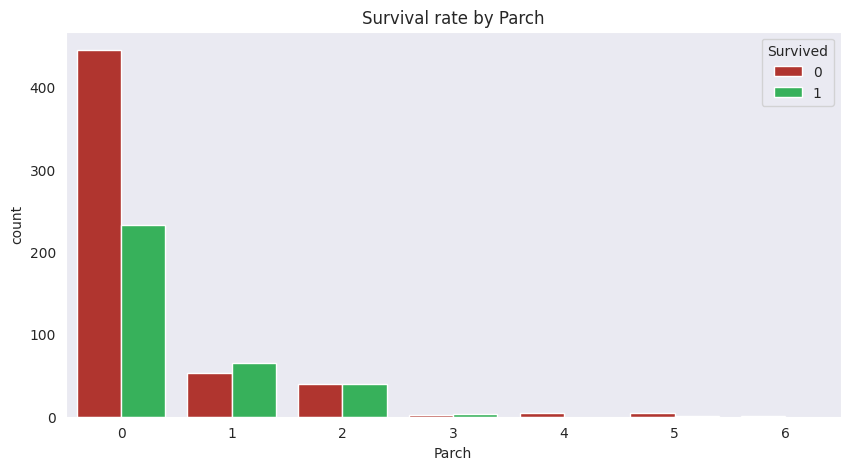

In [50]:
plt.figure(figsize = [10,5])
plt.title('Survival rate by Parch')
sns.countplot(x='Parch', hue='Survived', palette=('#C52219', '#23C552'), data=train_data)

In [51]:
train_data['Fam_size'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Fam_size'] = test_data['SibSp'] + test_data['Parch'] + 1

<ipython-input-52-cb1cc4cd76fd>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x='Fam_size', y='Survived', palette="magma", ci=None, data=train_data).set_ylabel('Survival rate')
<ipython-input-52-cb1cc4cd76fd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='Fam_size', y='Survived', palette="magma", ci=None, data=train_data).set_ylabel('Survival rate')


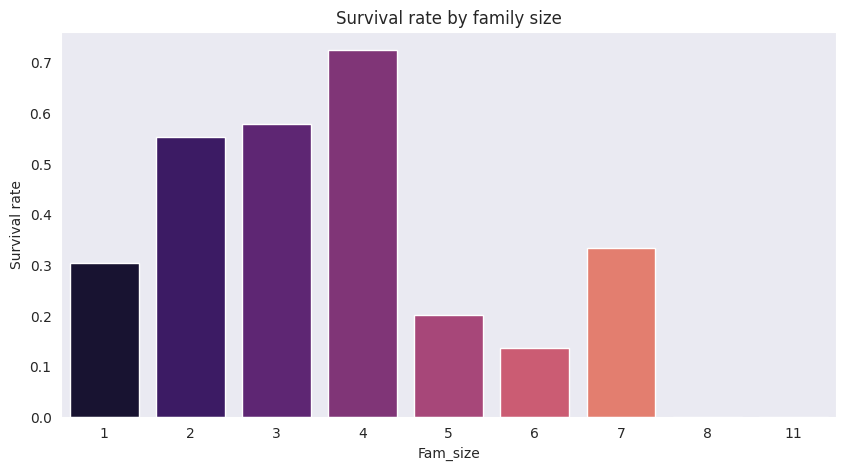

In [52]:
plt.figure(figsize=(10,5))
plt.title('Survival rate by family size')
g = sns.barplot(x='Fam_size', y='Survived', palette="magma", ci=None, data=train_data).set_ylabel('Survival rate')

<Axes: title={'center': 'Survival rate by family size'}, xlabel='Fam_size', ylabel='count'>

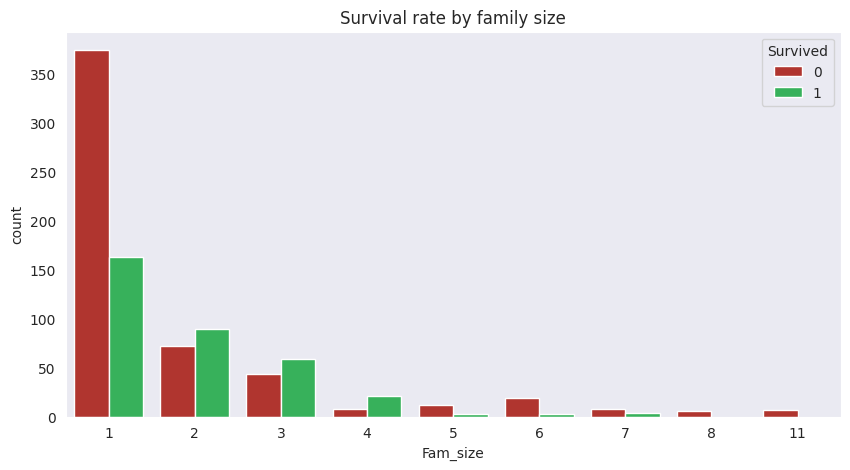

In [53]:
plt.figure(figsize=(10,5))
plt.title('Survival rate by family size')
sns.countplot(x='Fam_size', hue='Survived', data=train_data, palette=('#C52219', '#23C552'))

In [54]:
train_data['Fam_type'] = pd.cut(train_data.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])
test_data['Fam_type'] = pd.cut(test_data.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])

<ipython-input-55-264849f6b255>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x=train_data.Fam_type, y=train_data.Survived, palette='twilight', ci=None).set_ylabel('Survival rate')
<ipython-input-55-264849f6b255>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x=train_data.Fam_type, y=train_data.Survived, palette='twilight', ci=None).set_ylabel('Survival rate')


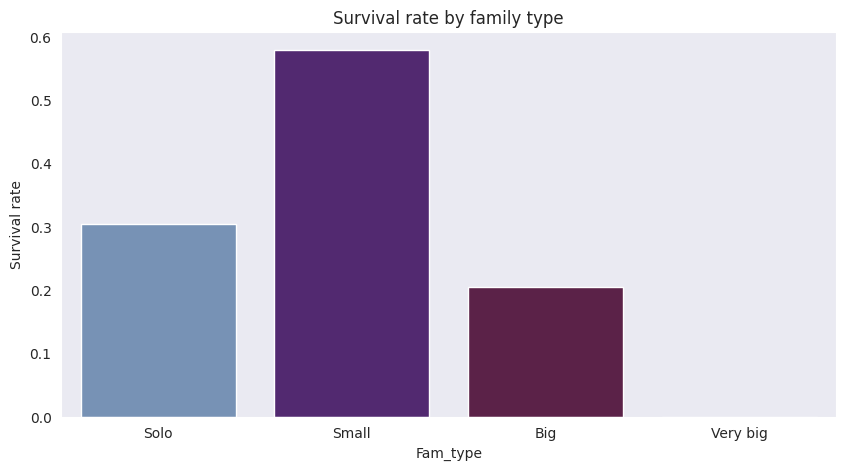

In [55]:
plt.figure(figsize=(10,5))
plt.title('Survival rate by family type')
g = sns.barplot(x=train_data.Fam_type, y=train_data.Survived, palette='twilight', ci=None).set_ylabel('Survival rate')

<Axes: title={'center': 'Survival rate by family type'}, xlabel='Fam_type', ylabel='count'>

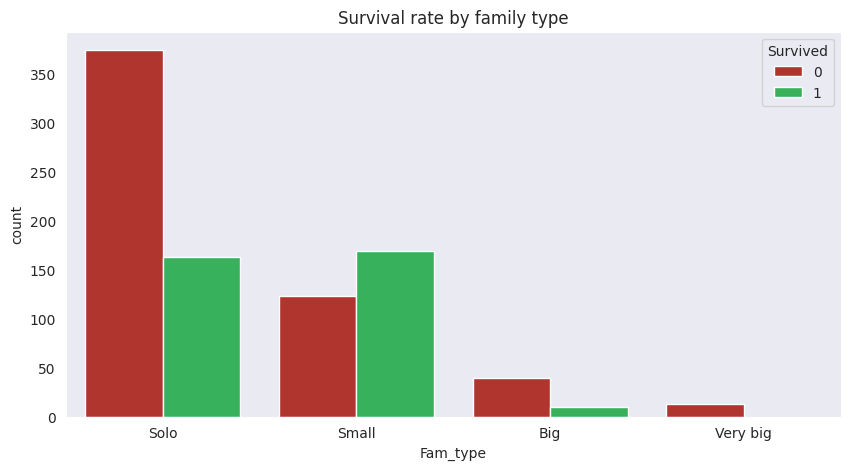

In [57]:
plt.figure(figsize=(10,5))
plt.title('Survival rate by family type')
sns.countplot(x='Fam_type', hue='Survived', data=train_data, palette=('#C52219', '#23C552'))

In [58]:
y = train_data['Survived']
features = ['Pclass', 'Fare', 'Title', 'Embarked', 'Fam_type', 'Ticket_len', 'Ticket_lett']
X = train_data[features]
X.head()
X_test = test_data[features]

In [59]:
X_test

,Pclass,Fare,Title,Embarked,Fam_type,Ticket_len,Ticket_lett
0,3,7.8292,Mr,Q,Solo,6,33
1,3,7.0000,Mrs,S,Small,6,36
2,2,9.6875,Mr,Q,Solo,6,24
3,3,8.6625,Mr,S,Solo,6,31
4,3,12.2875,Mrs,S,Small,7,31
...,...,...,...,...,...,...,...
413,3,8.0500,Mr,S,Solo,9,A.
414,1,108.9000,Miss,C,Solo,8,PC
415,3,7.2500,Mr,S,Solo,18,SO
416,3,8.0500,Mr,S,Solo,6,35


In [60]:
one_hot_encoded_training_predictors = pd.get_dummies(X)
one_hot_encoded_test_predictors = pd.get_dummies(X_test)
final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                    join='left',
                                                                    axis=1)

In [61]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(final_train,y)

In [62]:
xtr

,Pclass,Fare,Ticket_len,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Embarked_C,...,Ticket_lett_PC,Ticket_lett_PP,Ticket_lett_S.,Ticket_lett_SC,Ticket_lett_SO,Ticket_lett_ST,Ticket_lett_SW,Ticket_lett_W.,Ticket_lett_W/,Ticket_lett_WE
340,2,26.0000,6,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
124,1,77.2875,5,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
578,3,14.4583,4,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
821,3,8.6625,6,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
395,3,7.7958,6,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,1,263.0000,5,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
200,3,9.5000,6,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
876,3,9.8458,4,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
622,3,15.7417,4,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [63]:
ytr

,Survived
340,1
124,0
578,0
821,1
395,0
...,...
438,0
200,0
876,0
622,1


In [64]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(xtr)

In [69]:
from sklearn import tree
alg=tree.DecisionTreeClassifier()
alg.fit(data_with_imputed_values,ytr)

DecisionTreeClassifier()

In [70]:
final_test.fillna(0)

,Pclass,Fare,Ticket_len,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Embarked_C,...,Ticket_lett_PC,Ticket_lett_PP,Ticket_lett_S.,Ticket_lett_SC,Ticket_lett_SO,Ticket_lett_ST,Ticket_lett_SW,Ticket_lett_W.,Ticket_lett_W/,Ticket_lett_WE
0,3,7.8292,6,False,False,False,True,False,False,False,...,False,False,False,False,False,False,0.0,False,0.0,0.0
1,3,7.0000,6,False,False,False,False,True,False,False,...,False,False,False,False,False,False,0.0,False,0.0,0.0
2,2,9.6875,6,False,False,False,True,False,False,False,...,False,False,False,False,False,False,0.0,False,0.0,0.0
3,3,8.6625,6,False,False,False,True,False,False,False,...,False,False,False,False,False,False,0.0,False,0.0,0.0
4,3,12.2875,7,False,False,False,False,True,False,False,...,False,False,False,False,False,False,0.0,False,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,8.0500,9,False,False,False,True,False,False,False,...,False,False,False,False,False,False,0.0,False,0.0,0.0
414,1,108.9000,8,False,False,True,False,False,False,True,...,True,False,False,False,False,False,0.0,False,0.0,0.0
415,3,7.2500,18,False,False,False,True,False,False,False,...,False,False,False,False,True,False,0.0,False,0.0,0.0
416,3,8.0500,6,False,False,False,True,False,False,False,...,False,False,False,False,False,False,0.0,False,0.0,0.0


In [71]:
final_test.describe()


,Pclass,Fare,Ticket_len,Ticket_lett_14,Ticket_lett_27,Ticket_lett_45,Ticket_lett_54,Ticket_lett_57,Ticket_lett_84,Ticket_lett_A4,Ticket_lett_Fa,Ticket_lett_LI,Ticket_lett_P/,Ticket_lett_SW,Ticket_lett_W/,Ticket_lett_WE
count,418.000000,418.000000,418.000000,418.0,418.0,418.0,418.0,418.0,418.0,418.0,418.0,418.0,418.0,418.0,418.0,418.0
mean,2.265550,35.541956,6.875598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.841838,55.867684,2.821437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.000000,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.000000,7.895800,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.000000,14.454200,6.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,3.000000,31.471875,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,3.000000,512.329200,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
final_test=final_test.replace(np.nan, 0)

In [73]:
predictions = alg.predict(final_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [74]:
predictions.shape

(418,)

In [75]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!


Interview Questions

1.What is the difference between precision and recall?

Precision measures the proportion of true positive predictions among all positive predictions (TP / (TP + FP)).
Recall measures the proportion of true positive predictions among all actual positives (TP / (TP + FN)).
Precision is about accuracy in positive predictions, while recall focuses on capturing all actual positives.

2.What is cross-validation, and why is it important in binary classification?

Cross-validation splits the dataset into multiple subsets (folds) to train and validate the model iteratively. This ensures that the model generalizes well to unseen data.
It prevents overfitting and gives a better estimate of the model's performance by using different parts of the data for training and validation.